In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/airline_passengers.csv', index_col=0, parse_dates=True)

In [6]:
df = df.dropna()

In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
df.index.freq = 'MS'

In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [10]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [12]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [14]:
test_prediction = fitted_model.forecast(12*3)

In [15]:
train_data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1957-09-01,404
1957-10-01,347
1957-11-01,305


In [16]:
test_prediction

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

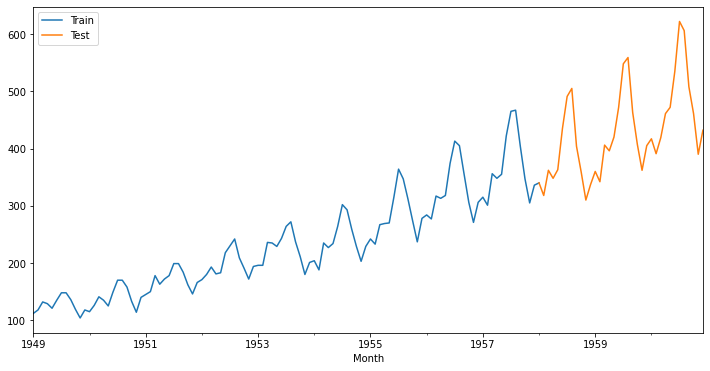

In [17]:
train_data['Thousands of Passengers'].plot(figsize=(12,6), legend=True , label='Train')
test_data['Thousands of Passengers'].plot(figsize=(12,6), legend=True , label='Test')

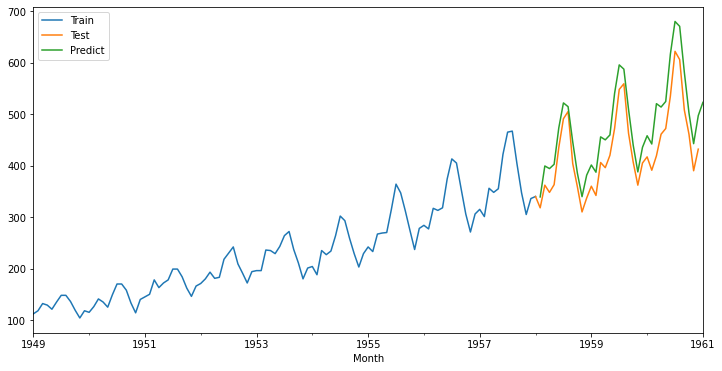

In [18]:
train_data['Thousands of Passengers'].plot(figsize=(12,6), legend=True , label='Train')
test_data['Thousands of Passengers'].plot(figsize=(12,6), legend=True , label='Test')
test_prediction.plot(figsize=(12,6), legend=True , label='Predict')

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [21]:
mean_absolute_error(test_data, test_prediction)

63.03138491847624

In [22]:
mean_squared_error(test_data, test_prediction)


5614.4207149269

In [23]:
np.sqrt(mean_squared_error(test_data, test_prediction))

74.92943823976594

In [24]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [25]:
forecast_predicts = final_model.forecast(36)

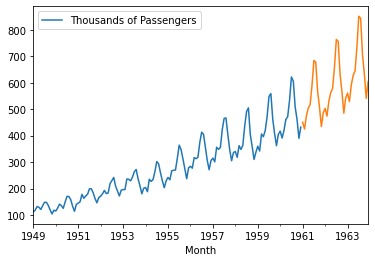

In [26]:
df.plot()
forecast_predicts.plot()

In [27]:
df2 = pd.read_csv('../data/samples.csv', index_col=0, parse_dates=True)

In [28]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


# stationary data

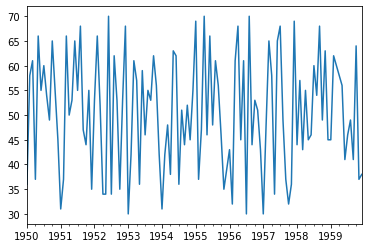

In [29]:

# stationary data

df2['a'].plot();


# non-stationary data

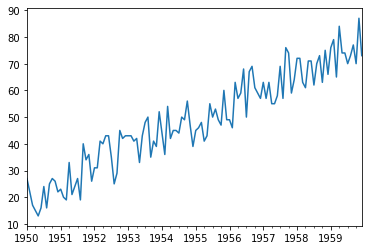

In [30]:

# non-stationary data
df2['b'].plot();

### Import dff from statsmodel.tsa.statespace.tools



manual




In [31]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

with the package



In [32]:
from statsmodels.tsa.statespace.tools import diff

In [33]:
diff(df2['b'], k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

In [34]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, acovf, pacf, pacf_yw, pacf_ols

In [35]:
df3 = pd.read_csv('../data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)

In [36]:
df3.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [37]:
df3.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [38]:
df3.index.freq = 'D'

In [39]:
df3.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [40]:
df4 = pd.DataFrame({'a': [13, 5, 11, 12, 9]})

In [41]:
df4

,a
0,13
1,5
2,11
3,12
4,9


In [42]:
acf(df4['a'])

C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [44]:
pacf_yw(df4['a'], nlags=4)

C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [45]:
pacf_yw(df4['a'], nlags=4, method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [46]:
pacf_ols(df4['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [47]:
from pandas.plotting import lag_plot

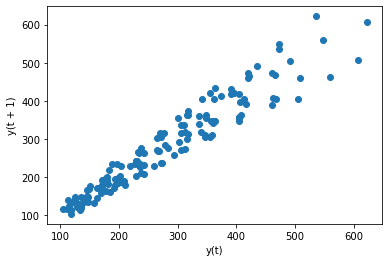

In [48]:
lag_plot(df['Thousands of Passengers'])


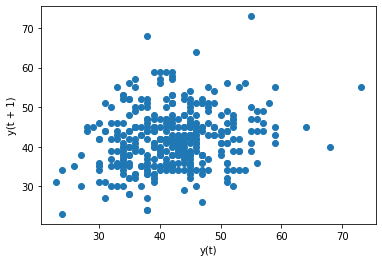

In [49]:
lag_plot(df3['Births'])

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

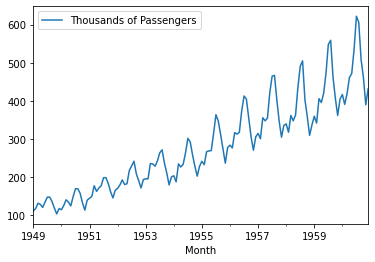

In [51]:
df.plot()

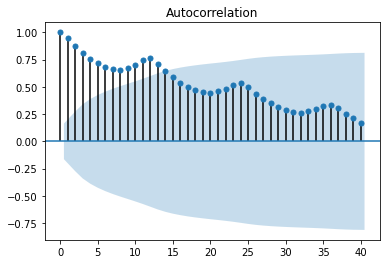

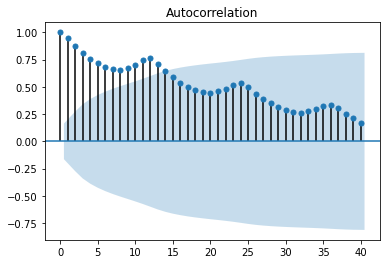

In [53]:
plot_acf(df['Thousands of Passengers'], lags=40)

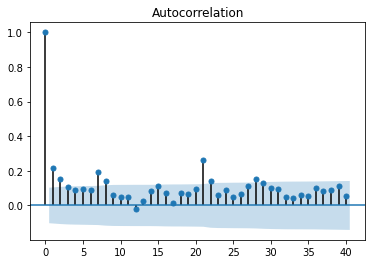

In [54]:
plot_acf(df3, lags=40);

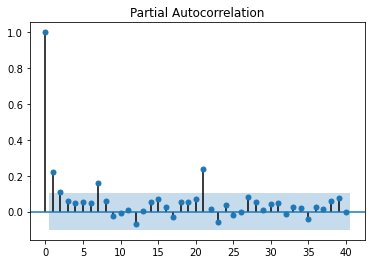

In [55]:

plot_pacf(df3, lags=40);

C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


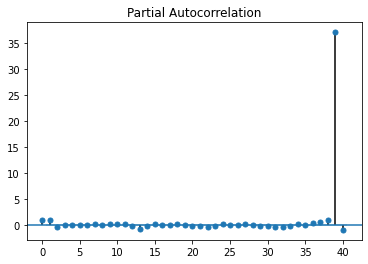

In [57]:
plot_pacf(df, lags=40);